In [47]:
#Importing needed packages
import numpy as np
import astropy
import matplotlib.pyplot as plt
from helita.sim import rh15d
from astropy.io import fits
from matplotlib import cm
import h5py
from scipy.io import readsav
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.image import NonUniformImage
import tqdm

In [350]:
#Define functions in the beginning of the programme
def radiation_temperature(lambda_ref, I_sp):
    """Compute the radiation/brightness temperature 
    from specific intensity"""
    h =6.62607015e-34 #J-s
    c = 3.0e8 #m/s
    k_b = 1.380649e-23 # J/K
    N_r = (h*c)/(lambda_ref*k_b)
    vary = (2*h*c**2)/(lambda_ref**5)
    D_r = np.log((vary/(I_sp*c/lambda_ref**2)+1))
    T_rad = N_r/D_r
    return T_rad

In [2]:
dpath_simulation ='/mn/stornext/d5/juanms/mpi3druns/2Druns/genohm/rain/l2d90x40rvk/sim_data_rh_it=280-369.hdf5'
input_sim = h5py.File(dpath_simulation,'r')

In [3]:
temp_juan=input_sim['temperature']
vel_juan=input_sim['velocity_z']
z    = input_sim['z']#Height (m)
x    = input_sim['x']#Spatial [m]
y    = input_sim['y']# time []

In [4]:
dpath_rh_2='/mn/stornext/d9/souvikb/Juan_Mg7/'
dpath_rh_3='/mn/stornext/d9/souvikb/Juan_Mg8/'

#data_2 = h5py.File(dpath_rh_2+'output_ray_CaII_PRD_s000.hdf5')
#data_3 = h5py.File(dpath_rh_3+'output_ray_CaII_PRD_s000.hdf5')
data_2 = h5py.File(dpath_rh_2+'output_ray_CaII_PRD_s280.hdf5','r')
data_3 = h5py.File(dpath_rh_3+'output_ray_MgII_PRD_s280.hdf5','r')

In [5]:
#data_2_RHsuite = rh15d.Rh15dout(dpath_rh_2)
#wave = data_2_RHsuite.ray.wavelength

--- Read /mn/stornext/d9/souvikb/Juan_Mg7/output_aux.hdf5 file.
--- Read /mn/stornext/d9/souvikb/Juan_Mg7/output_indata.hdf5 file.


/mn/stornext/u3/souvikb/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))


In [5]:
MgH_K_2=np.array(data_2['intensity'])
MgH_K_3=np.array(data_3['intensity'])
wave_mg = np.array(data_2['wavelength'])
indices = np.arange(len(wave_mg))[(wave_mg >279.4 ) & (wave_mg < 280.5)]

In [22]:
##--------Data path 
ray_path='/mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan/'
f = open(ray_path+'ray.input', 'w')
output = str(len(indices) + 1)
for ind in indices:
    output += ' %i' % ind
    #print(ind)
#output += ' %i\n' % index500 
f.write(output)
f.close()
#print(len(output))

In [6]:
dpath_new_res = '/mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan/output/'
#data_cont = h5py.File(dpath_new_res+'output_ray.hdf5','r')
data_ray_aux = rh15d.Rh15dout(dpath_new_res)

--- Read /mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan/output/output_aux.hdf5 file.
--- Read /mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan/output/output_indata.hdf5 file.
--- Read /mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan/output/output_ray.hdf5 file.


/mn/stornext/u3/souvikb/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/mn/stornext/u3/souvikb/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  self.ray = xr.open_dataset(infile, autoclose=True)


In [26]:
data_cont.keys()

<KeysViewHDF5 ['Jlambda', 'chi', 'height', 'intensity', 'scattering', 'source_function', 'stokes_Q', 'stokes_U', 'stokes_V', 'tau_one_height', 'wavelength', 'wavelength_indices', 'wavelength_selected', 'x', 'y']>

In [29]:
Source_func = data_cont['source_function']
I_sp = data_cont['intensity']
Tau_ht = data_cont['tau_one_height']
Chi = data_cont['chi']

In [110]:
Tau_ht = data_cont['tau_one_height']

NameError: name 'data_cont' is not defined

In [36]:
Source_func.shape, Chi.shape, I_sp.shape,Tau_ht.shape

((1, 2, 1554, 377), (1, 2, 1554, 377), (1, 2, 890), (1, 2, 890))

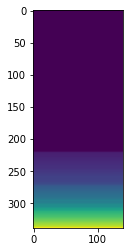

In [71]:
plt.imshow((Source_func[0,1,1215:,12:152]))
#plt.plot()

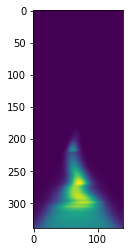

In [72]:
plt.imshow(Chi[0,1,1215:,12:152])

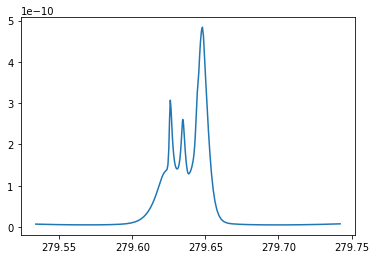

In [41]:
plt.plot(wave_mg[indices[12:152]],I_sp[0,0,indices[12:152]])

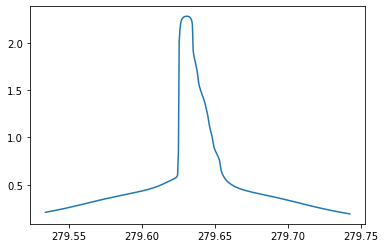

In [46]:
plt.plot(wave_mg[indices[12:152]],Tau_ht[0,0,indices[12:152]]/1e6)

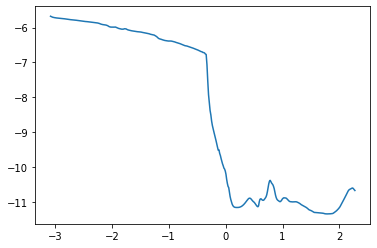

In [79]:
plt.plot(z[0,1220:]/1e6,np.log10(Source_func[0,0,1220:,130]))

In [57]:
z[0,15]/1e6

2.272336

In [136]:
temp_juan.shape, vel_juan.shape

((1, 6930, 90, 1554), (1, 6930, 90, 1554))

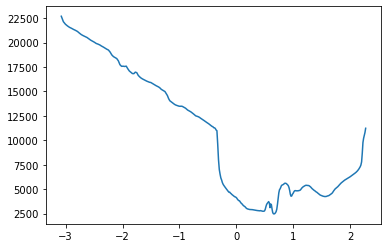

In [80]:
plt.plot(z[0,1220:]/1e6,temp_juan[0,4860,10,1220:])

In [9]:
data_ray_aux.atmos.height_scale.shape

(1, 2, 1554)

In [29]:
#--- Computing the optical depths at different frequencies----

from scipy import integrate
tau_lambda=np.zeros((140,339))
for wl in range(140):
    height = data_ray_aux.atmos.height_scale[0, 0].dropna('height')
    tau_lambda_test = integrate.cumtrapz(data_ray_aux.ray.chi[0, 0, :, 12+wl].dropna('height'), x=-height)
    tau_lambda[wl,:]= np.concatenate([[1e-20], tau_lambda_test])

12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151


In [31]:
tau_lambda.shape

(140, 339)

In [44]:
chi = data_ray_aux.ray.chi[0,0,1215:,12:152]
Source_function = data_ray_aux.ray.source_function[0,0,1215:,12:152]

In [41]:
tau_lambda = tau_lambda.T

In [45]:
tau_lambda.shape, chi.shape, Source_function.shape

((339, 140), (339, 140), (339, 140))

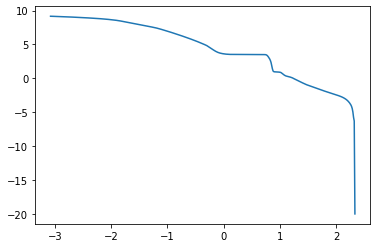

In [39]:
plt.plot(height/1e6, np.log10(tau_lambda[100,:]))

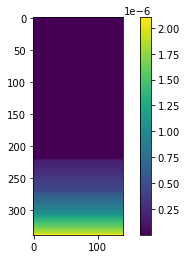

In [167]:
plt.imshow((Source_function))
plt.colorbar()

In [50]:
chi_factor = chi/tau_lambda
tau_factor = tau_lambda*np.exp(-tau_lambda)

In [71]:
chi_factor.min()

<xarray.DataArray 'chi' ()>
array(1.799707e-09)
Coordinates:
    x        float64 6.751e+07
    y        float64 290.0

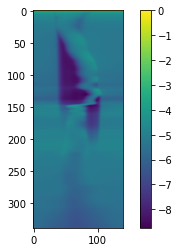

In [117]:
plt.imshow(np.log10(chi_factor),vmax=0)
plt.colorbar()

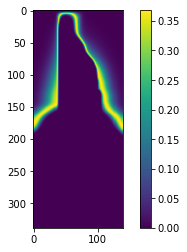

In [60]:
plt.imshow(tau_factor)
plt.colorbar()

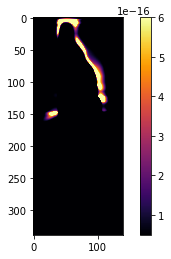

In [193]:
plt.imshow((chi_factor*tau_factor*Source_function),vmax=6e-16,vmin=0.5e-16,cmap='inferno')
plt.colorbar()

In [90]:
z1 = z[0,:]/1e6
z1.shape
Mg_center = 2796.3442391734520/10
dopp_Mgk = ((wave_mg[indices[12:152]]-Mg_center)/Mg_center)*3e5
x1 = dopp_Mgk
extend = (x1.min(),x1.max(),z1.max(),z1.min())
x_pos1=4865-4176
x_pos2=4980-4176

In [102]:
chi_factor.shape

(339, 140)

In [103]:
1410-1214

196

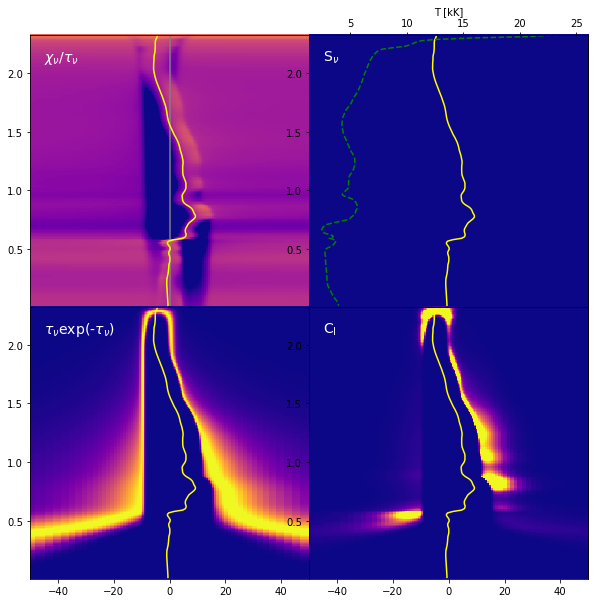

In [215]:
xdopp_minmax=[-50,50]
fig, axs =plt.subplots(2,2,figsize=(10,10),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.0,wspace=0.0)
axs=axs.ravel()

norm1 = cm.colors.Normalize(vmax=-2, vmin=-7)
im0 = NonUniformImage(axs[0], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[1215]],cmap='plasma',norm=norm1)
im0.set_data(x1,z1[:1214:-1],np.flipud(np.squeeze(np.log10(chi_factor))))
axs[0].set_xlim(-50,50)
axs[0].set_ylim(z1[1410],2.32)
axs[0].images.append(im0)    
#axs[0].plot(dopp_Mgk,Tau_ht[0,0,indices[12:152]]/1e6)
axs[0].axvline(x=0, color='gray')
axs[0].text(-45,2.1,r'$\chi_{\nu}$/$\tau_{\nu}$',color='white',size=14)
axs[0].plot(-1*vel_juan[0,4860,10,1215:1410]/1e3,z1[1215:1410],color='yellow')

norm2 = cm.colors.Normalize(vmax=12, vmin=0.25)
im1 = NonUniformImage(axs[1], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[1215]],cmap='plasma',norm=norm2)
im1.set_data(x1,z1[:1214:-1],np.flipud(np.squeeze(np.log10(Source_function))))
axs[1].set_xlim(-50,50)
axs[1].set_ylim(z1[1410],2.32)
axs[1].images.append(im1)
axs[1].text(-45,2.1,r'S$_{\nu}$',color='white',size=14)
axs[1].plot(-1*vel_juan[0,4860,10,1215:1410]/1e3,z1[1215:1410],color='yellow')

ax2=axs[1].twiny()
#color ='tab:black'
ax2.set_xlabel('T [kK]')
ax2.plot(temp_juan[0,4860,10,1215:1410]/1e3,z1[1215:1410],color='green', linestyle='dashed')

norm3 = cm.colors.Normalize(vmax=0.35, vmin=0)
im2 = NonUniformImage(axs[2], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[1215]],cmap='plasma',norm=norm3)
im2.set_data(x1,z1[:1214:-1],np.flipud(np.squeeze((tau_factor))))
axs[2].set_xlim(-50,50)
axs[2].set_ylim(z1[1410],2.32)
axs[2].images.append(im2)
axs[2].text(-45,2.1,r'$\tau_{\nu}$exp(-$\tau_{\nu}$)',color='white',size=14)
axs[2].plot(-1*vel_juan[0,4860,10,1215:1410]/1e3,z1[1215:1410],color='yellow')

norm4 = cm.colors.Normalize(vmax=7e-16, vmin=0)
im3 = NonUniformImage(axs[3], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[1215]],cmap='plasma',norm=norm4)
im3.set_data(x1,z1[:1214:-1],np.flipud(np.squeeze((chi_factor*tau_factor*Source_function))))
axs[3].set_xlim(-50,50)
axs[3].set_ylim(z1[1410],2.32)
axs[3].images.append(im3)
axs[3].text(-45,2.1,r'C$_{\mathrm{I}}$',color='white',size=14)
axs[3].plot(-1*vel_juan[0,4860,10,1215:1410]/1e3,z1[1215:1410],color='yellow')
#axs[3].plot(I_sp[0,0,indices[12:152]])



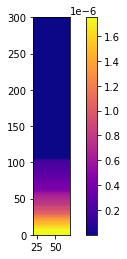

In [216]:
plt.imshow((Source_function),cmap='plasma',vmax=1.75e-6,extent=[20,70,0,300])
plt.colorbar()

In [174]:
Source_function.min(), Source_function.max()

(<xarray.DataArray 'source_function' ()>
 array(2.170911e-12, dtype=float32)
 Coordinates:
     x        float64 6.751e+07
     y        float64 290.0, <xarray.DataArray 'source_function' ()>
 array(2.101462e-06, dtype=float32)
 Coordinates:
     x        float64 6.751e+07
     y        float64 290.0)

In [175]:
np.min(Source_function)

<xarray.DataArray 'source_function' ()>
array(2.170911e-12, dtype=float32)
Coordinates:
    x        float64 6.751e+07
    y        float64 290.0

In [176]:
np.max(Source_function)

<xarray.DataArray 'source_function' ()>
array(2.101462e-06, dtype=float32)
Coordinates:
    x        float64 6.751e+07
    y        float64 290.0

In [211]:
Source_function.shape

(339, 140)

## Contribution function analysis for the newer version -- Upflows

In [218]:
dpath_Mg_new = '/mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan_new/output/'
dataMg_ray_aux = rh15d.Rh15dout(dpath_Mg_new)

--- Read /mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan_new/output/output_aux.hdf5 file.
--- Read /mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan_new/output/output_indata.hdf5 file.
--- Read /mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan_new/output/output_ray.hdf5 file.


/mn/stornext/u3/souvikb/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/mn/stornext/u3/souvikb/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  self.ray = xr.open_dataset(infile, autoclose=True)


In [221]:
#======= Declaring variables to be used for the computation========
I_sp = dataMg_ray_aux.ray.intensity
Chi_new = dataMg_ray_aux.ray.chi
S_new = dataMg_ray_aux.ray.source_function
Tau_ht_new = dataMg_ray_aux.ray.tau_one_height
I_sp.shape, S_new.shape, Tau_ht_new.shape, Chi_new.shape

((10, 3, 890), (10, 3, 1554, 377), (10, 3, 890), (10, 3, 1554, 377))

In [480]:
dataMg_ray_aux.atmos.height_scale[6, 2].dropna('height').shape

(573,)

### (X,Y)= (6,2) indicates the time_index =14 (Y=2) and X = 4866 in pixels. 

In [245]:
#======= Computing optical depths at various frequencies ===========

from scipy import integrate
N_x = 140
N_y = len(dataMg_ray_aux.atmos.height_scale[6, 2].dropna('height'))#shape 
X_pix = 6
Y_pix = 2 #This is the time axis in 2.5D simulations because RH1.5D can't parallelize in time.
tau_lambda_new=np.zeros((140,N_y)) #140 is the wavelength, N_y is the height
for wl in range(140):
    height = dataMg_ray_aux.atmos.height_scale[X_pix, Y_pix].dropna('height')
    tau_lambda_test = integrate.cumtrapz(Chi_new[X_pix, Y_pix, :, 12+wl].dropna('height'), x=-height)
    tau_lambda_new[wl,:]= np.concatenate([[1e-20], tau_lambda_test])

## Factors to be included in Contribution function

In [345]:
chi_factor_new = (Chi_new[X_pix,Y_pix, :, 12:152].dropna('height').T/tau_lambda_new)
tau_factor_new = tau_lambda_new*np.exp(-tau_lambda_new)
S_factor_new = S_new[X_pix,Y_pix,:,12:152].dropna('height').T
C_I = S_factor_new*tau_factor_new*chi_factor_new

## Spectral and Spatial convolution

In [381]:
#Spatial convolution for each wavelength position per unit time with an FWHM of 0.33 arcsec
#Saptial sampling of the simulation is ~14 km and the spatial resolution of IRIS is ~240 km. Assuming an FWHM of 240 km, leads to a standard
# deviation that is given by 240/2.335 km ~ 102 km in the x direction in the simulation. Hence defining a Gaussian kernel with a std dev =8
# Performing a 1D spatial convolution for all x position per unit time for each wavelength position with the Astropy convolve function.
from astropy.convolution import Gaussian1DKernel,convolve
#gauss_kernel_IRIS = Gaussian1DKernel(8)
gauss_kernel = Gaussian1DKernel(2)
space_conv_MgK = np.zeros((10,3,140))
#space_conv_tau_Mgk = np.zeros((size_intensity[0],size_intensity[1],140))
for time in range(3):
    for wav in range(140):
        space_conv_MgK[:,time,wav] = convolve(I_sp[:,time,indices[wav+12]],gauss_kernel,normalize_kernel=True,boundary='extend')
        #space_conv_tau_Mgk[:,time,wav] = convolve(tau_comb[:,time,indices[wav+12]],gauss_kernel,normalize_kernel=True,boundary='extend')

In [382]:
#Spectral convolution per time step per unit x-position.
# First spatial smeraing and then spectral smearing as per the light path in the telescope.
#F_tran=readsav('/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/crispex/09:12:00/Ca_K_FP_profile2.sav')
#FP=np.array(F_tran['res2'])
#FP= FP/np.sum(FP)
#F_tran_8542=readsav('/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/crispex/09:12:00/Ca_8542_FP_profile.sav')
#FP_8542=np.array(F_tran_8542['tr1'])
#FP_8542= FP_8542/np.sum(FP_8542)
gauss_spectral_kernel = Gaussian1DKernel(10)
spec_conv_MgK = np.zeros((10,3,140))
#spec_conv_tau_Mgk = np.zeros((size_intensity[0],size_intensity[1],140))
for time in range(3):
    for x_space in range(10):
        spec_conv_MgK[x_space,time,:]=convolve(space_conv_MgK[x_space,time,:],gauss_spectral_kernel,boundary='extend',normalize_kernel=True)
        #spec_conv_tau_Mgk[x_space,time,:]=convolve(space_conv_tau_Mgk[x_space,time,:],gauss_spectral_kernel,boundary='extend',normalize_kernel=True)



In [386]:
4865-4860,4867-4860, spec_conv_MgK.shape

(5, 7, (10, 3, 140))

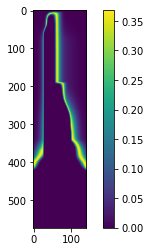

In [253]:
plt.imshow(tau_factor_new.T)
plt.colorbar()

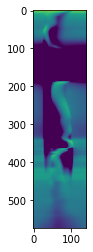

In [271]:
plt.imshow(np.log10(chi_factor_new.T),vmax=-3,vmin=-7)

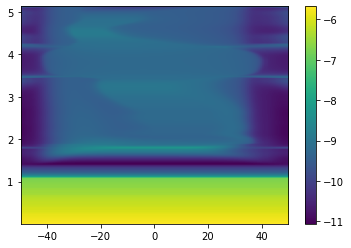

In [313]:
plt.imshow(np.log10((S_factor_new).T),extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[980]],aspect='auto')
plt.colorbar()

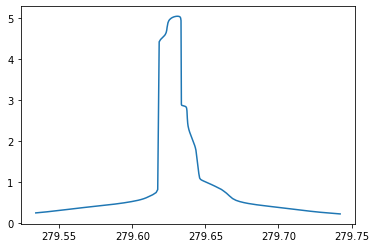

In [262]:
plt.plot(wave_mg[indices[12:152]],Tau_ht_new[X_pix,Y_pix,indices[12:152]]/1e6)

Text(0.5, 1.0, 'Unconvolvd')

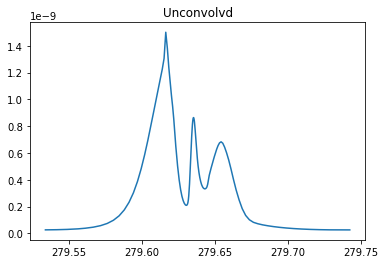

In [405]:
plt.plot(wave_mg[indices[12:152]],I_sp[0,Y_pix,indices[12:152]])
plt.title('Unconvolvd')

In [476]:
#======== Converting specific intensity to brightness temperature ======##
T_brightness = np.zeros((140))
for wl in range(140):
    T_brightness[wl] = radiation_temperature(lambda_ref=wave_mg[indices[12+wl]]*1e-9, I_sp=np.mean(spec_conv_MgK[X_pix-1:X_pix+1,Y_pix,wl],axis=0))

In [393]:
np.mean(spec_conv_MgK[X_pix-1:X_pix+1,Y_pix,:],axis=0).shape

(140,)

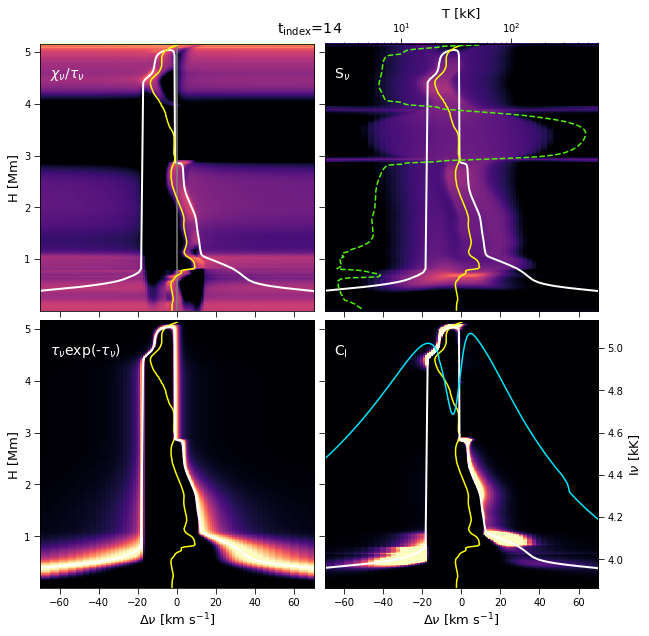

In [528]:
xdopp_minmax=[-70,70]
cmap1 = 'magma'
fig, axs =plt.subplots(2,2,figsize=(10,10),facecolor='w', edgecolor='k')
fig.suptitle(r't$_{\mathrm{index}}$=14',va='center',y=0.9,size='x-large')
fig.subplots_adjust(hspace = 0.04,wspace=0.04)
axs=axs.ravel()

norm1 = cm.colors.Normalize(vmax=-3, vmin=-7)
im0 = NonUniformImage(axs[0], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[980]],cmap=cmap1,norm=norm1)
im0.set_data(x1,z1[:980:-1],np.flipud(np.squeeze(np.log10(chi_factor_new.T))))
axs[0].set_xlim(-70,70)
axs[0].set_ylim(z1[1410],5.15)
axs[0].images.append(im0)    
axs[0].plot(dopp_Mgk,Tau_ht_new[X_pix,Y_pix,indices[12:152]]/1e6,color='white',linewidth=2)
axs[0].axvline(x=0, color='gray')
axs[0].text(-65,4.5,r'$\chi_{\nu}$/$\tau_{\nu}$',color='white',size=14)
axs[0].plot(-1*vel_juan[0,4866,14,980:1410]/1e3,z1[980:1410],color='yellow')
axs[0].set_ylabel('H [Mm]',fontsize=13)
axs[0].set_xticklabels([])
axs[0].tick_params(direction='out', length=6,color='black')

norm2 = cm.colors.Normalize(vmax=-7.5,vmin=-10)
im1 = NonUniformImage(axs[1], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[980]],cmap=cmap1,norm=norm2)
im1.set_data(x1,z1[:980:-1],np.flipud(np.squeeze(np.log10(S_factor_new.T))))
axs[1].set_xlim(-70,70)
axs[1].set_ylim(z1[1410],5.15)
axs[1].images.append(im1)    
axs[1].plot(dopp_Mgk,Tau_ht_new[X_pix,Y_pix,indices[12:152]]/1e6,color='white',linewidth=2)
axs[1].text(-65,4.5,r'S$_{\nu}$',color='white',size=14)
axs[1].plot(-1*vel_juan[0,4866,14,980:1410]/1e3,z1[980:1410],color='yellow')
axs[1].tick_params(direction='out', length=6,color='black')
axs[1].set_yticklabels([])
axs[1].set_xticklabels([])

ax2=axs[1].twiny()
#color ='tab:black'
ax2.set_xlabel('T [kK]',fontsize=13)
ax2.plot(temp_juan[0,4866,14,980:1410]/1e3,z1[980:1410],color='#52F208', linestyle='dashed')
ax2.set_xscale('log')
ax2.tick_params(direction='out', length=6,color='black')

norm3 = cm.colors.Normalize(vmax=0.35, vmin=0)
im2 = NonUniformImage(axs[2], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[980]],cmap=cmap1,norm=norm3)
im2.set_data(x1,z1[:980:-1],np.flipud(np.squeeze((tau_factor_new.T))))
axs[2].set_xlim(-70,70)
axs[2].set_ylim(z1[1410],5.15)
axs[2].images.append(im2)
axs[2].text(-65,4.5,r'$\tau_{\nu}$exp(-$\tau_{\nu}$)',color='white',size=14)
axs[2].plot(-1*vel_juan[0,4866,14,980:1410]/1e3,z1[980:1410],color='yellow')
axs[2].plot(dopp_Mgk,Tau_ht_new[X_pix,Y_pix,indices[12:152]]/1e6,color='white',linewidth=2)
axs[2].tick_params(direction='out', length=6,color='black')
axs[2].set_ylabel('H [Mm]',fontsize=13)
axs[2].set_xlabel(r'$\Delta$$\nu$ [km s$^{-1}$]',fontsize=13)

norm4 = cm.colors.Normalize(vmax=7e-16, vmin=0)
im3 = NonUniformImage(axs[3], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[980]],cmap=cmap1,norm=norm4)
im3.set_data(x1,z1[:980:-1],np.flipud(np.squeeze((C_I.T))))
axs[3].set_xlim(-70,70)
axs[3].set_ylim(z1[1410],5.15)
axs[3].images.append(im3)
axs[3].text(-65,4.5,r'C$_{\mathrm{I}}$',color='white',size=14)
axs[3].plot(-1*vel_juan[0,4866,14,980:1410]/1e3,z1[980:1410],color='yellow')
axs[3].plot(dopp_Mgk,Tau_ht_new[X_pix,Y_pix,indices[12:152]]/1e6,color='white',linewidth=2)
axs[3].tick_params(direction='out', length=6,color='black')
axs[3].set_yticklabels([])
axs[3].set_xlabel(r'$\Delta$$\nu$ [km s$^{-1}$]',fontsize=13)

ax3=axs[3].twinx()
#color ='tab:black'
ax3.set_ylabel(r'I$\nu$ [kK]',fontsize=13)
ax3.plot(dopp_Mgk,T_brightness/1e3,color='#03E5FA')
ax3.tick_params(direction='out', length=6,color='black')
#plt.savefig('/mn/stornext/d9/souvikb/paper5_results/Cont_func_RBE_Mg.pdf',dpi=400,format='pdf',bbox_inches = 'tight',pad_innches=0.1)

# Contribution function for the downflowing phase

In [510]:
dpath_Mg_DRRE = '/mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan_new/output_downflows_pops/'
dataMg_DRRE_ray_aux = rh15d.Rh15dout(dpath_Mg_DRRE)

--- Read /mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan_new/output_downflows_pops/output_aux.hdf5 file.
--- Read /mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan_new/output_downflows_pops/output_indata.hdf5 file.
--- Read /mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan_new/output_downflows_pops/output_ray.hdf5 file.


/mn/stornext/u3/souvikb/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/mn/stornext/u3/souvikb/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  self.ray = xr.open_dataset(infile, autoclose=True)


In [511]:
#======= Declaring variables to be used for the computation========
I_sp_DRRE = dataMg_DRRE_ray_aux.ray.intensity
Chi_new_DRRE = dataMg_DRRE_ray_aux.ray.chi
S_new_DRRE = dataMg_DRRE_ray_aux.ray.source_function
Tau_ht_new_DRRE = dataMg_DRRE_ray_aux.ray.tau_one_height
I_sp_DRRE.shape, S_new_DRRE.shape, Tau_ht_new_DREE.shape, Chi_new_DRRE.shape

((10, 6, 890), (10, 6, 1554, 377), (10, 6, 890), (10, 6, 1554, 377))

In [512]:
#======= Computing optical depths at various frequencies ===========

from scipy import integrate
N_x = 140
N_y = len(dataMg_DRRE_ray_aux.atmos.height_scale[6, 2].dropna('height'))#shape. But the N_x and N_y is coincidentally the same.
X_pix = 6
Y_pix = 2 #This is the time axis in 2.5D simulations because RH1.5D can't parallelize in time.
tau_lambda_new_DRRE=np.zeros((140,N_y)) #140 is the wavelength, N_y is the height
for wl in range(140):
    height = dataMg_DRRE_ray_aux.atmos.height_scale[X_pix, Y_pix].dropna('height')
    tau_lambda_test = integrate.cumtrapz(Chi_new_DRRE[X_pix, Y_pix, :, 12+wl].dropna('height'), x=-height)
    tau_lambda_new_DRRE[wl,:]= np.concatenate([[1e-20], tau_lambda_test])

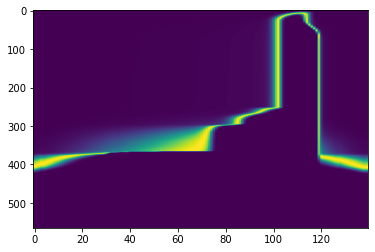

In [513]:
plt.imshow(tau_factor_new_DRRE.T,aspect='auto')

## Factors to be included in the contribution function

In [514]:
chi_factor_new_DRRE = (Chi_new_DRRE[X_pix,Y_pix, :, 12:152].dropna('height').T/tau_lambda_new_DRRE)
tau_factor_new_DRRE = tau_lambda_new_DRRE*np.exp(-tau_lambda_new_DRRE)
S_factor_new_DRRE = S_new_DRRE[X_pix,Y_pix,:,12:152].dropna('height').T
C_I_DRRE = S_factor_new_DRRE*tau_factor_new_DRRE*chi_factor_new_DRRE

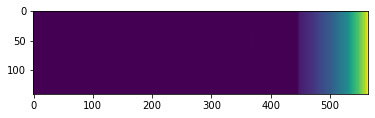

In [515]:
plt.imshow(S_factor_new_DRRE)

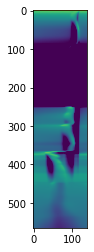

In [516]:
plt.imshow(np.log10(chi_factor_new_DRRE).T,vmax=-3, vmin=-7)

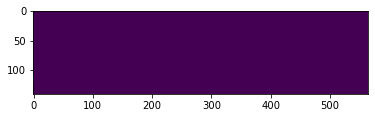

In [517]:
plt.imshow(Chi_new_DRRE[X_pix,Y_pix, :, 12:152].dropna('height').T/tau_lambda_new_DRRE)

## Spectral and spatial convolution

In [518]:
#Spatial convolution for each wavelength position per unit time with an FWHM of 0.33 arcsec
#Saptial sampling of the simulation is ~14 km and the spatial resolution of IRIS is ~240 km. Assuming an FWHM of 240 km, leads to a standard
# deviation that is given by 240/2.335 km ~ 102 km in the x direction in the simulation. Hence defining a Gaussian kernel with a std dev =8
# Performing a 1D spatial convolution for all x position per unit time for each wavelength position with the Astropy convolve function.
from astropy.convolution import Gaussian1DKernel,convolve
#gauss_kernel_IRIS = Gaussian1DKernel(8)
gauss_kernel = Gaussian1DKernel(2)
space_conv_MgK_DRRE = np.zeros((10,6,140))
#space_conv_tau_Mgk = np.zeros((size_intensity[0],size_intensity[1],140))
for time in range(6):
    for wav in range(140):
        space_conv_MgK_DRRE[:,time,wav] = convolve(I_sp_DRRE[:,time,indices[wav+12]],gauss_kernel,normalize_kernel=True,boundary='extend')
        #space_conv_tau_Mgk[:,time,wav] = convolve(tau_comb[:,time,indices[wav+12]],gauss_kernel,normalize_kernel=True,boundary='extend')

In [519]:
#Spectral convolution per time step per unit x-position.
# First spatial smeraing and then spectral smearing as per the light path in the telescope.
#F_tran=readsav('/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/crispex/09:12:00/Ca_K_FP_profile2.sav')
#FP=np.array(F_tran['res2'])
#FP= FP/np.sum(FP)
#F_tran_8542=readsav('/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/crispex/09:12:00/Ca_8542_FP_profile.sav')
#FP_8542=np.array(F_tran_8542['tr1'])
#FP_8542= FP_8542/np.sum(FP_8542)
gauss_spectral_kernel = Gaussian1DKernel(10)
spec_conv_MgK_DRRE = np.zeros((10,6,140))
#spec_conv_tau_Mgk = np.zeros((size_intensity[0],size_intensity[1],140))
for time in range(6):
    for x_space in range(10):
        spec_conv_MgK_DRRE[x_space,time,:]=convolve(space_conv_MgK_DRRE[x_space,time,:],gauss_spectral_kernel,boundary='extend',normalize_kernel=True)
        #spec_conv_tau_Mgk[x_space,time,:]=convolve(space_conv_tau_Mgk[x_space,time,:],gauss_spectral_kernel,boundary='extend',normalize_kernel=True)




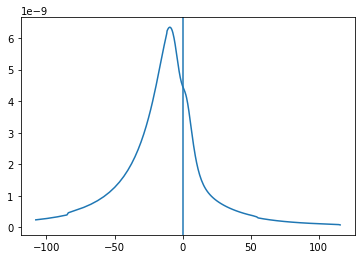

In [520]:
plt.plot(dopp_Mgk, np.mean(spec_conv_MgK_DRRE[X_pix-1:X_pix+1,2,:],axis=0))
plt.axvline(x=0)

In [521]:
#======== Converting specific intensity to brightness temperature ======##
T_brightness_DRRE = np.zeros((140))
for wl in range(140):
    T_brightness_DRRE[wl] = radiation_temperature(lambda_ref=wave_mg[indices[12+wl]]*1e-9, I_sp=np.mean(spec_conv_MgK_DRRE[X_pix-1:X_pix+1,Y_pix,wl],axis=0))

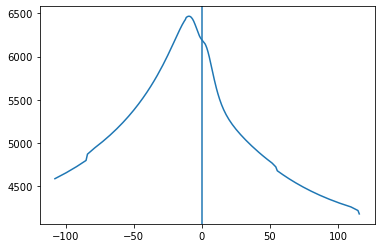

In [522]:
plt.plot(dopp_Mgk, T_brightness_DRRE)
plt.axvline(x=0)

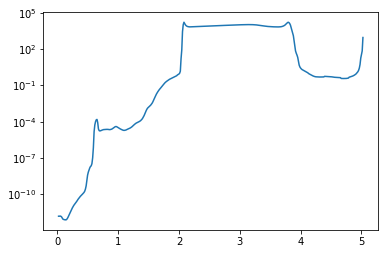

In [523]:
continuum_DRRE = dataMg_DRRE_ray_aux.atom_MG.populations[10,X_pix,Y_pix,988:1410]
tot_mgII_DRRE = np.sum(dataMg_DRRE_ray_aux.atom_MG.populations[0:9,X_pix,Y_pix,988:1410],axis=0)

plt.plot(z1[988:1410],continuum_DRRE/tot_mgII_DRRE)
plt.yscale('log')

/astro/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_innches" which is no longer supported as of 3.3 and will become an error two minor releases later


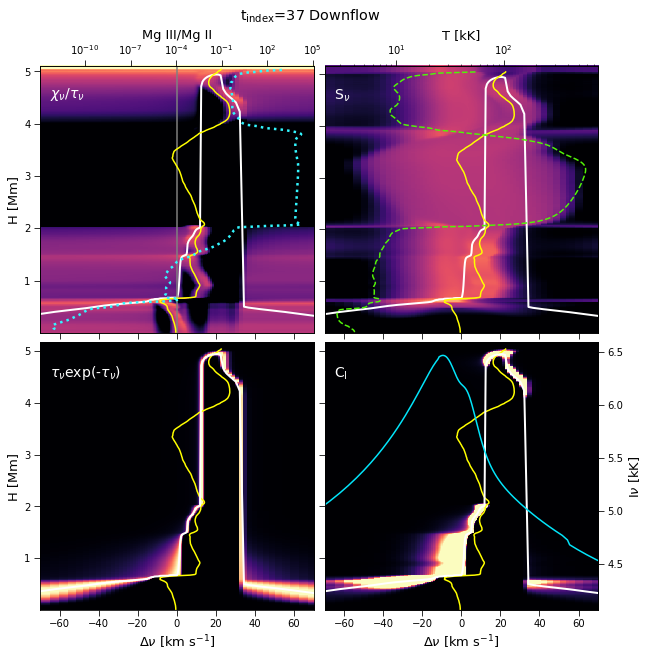

In [527]:
xdopp_minmax=[-70,70]
cmap1 = 'magma'
fig, axs =plt.subplots(2,2,figsize=(10,10),facecolor='w', edgecolor='k')
fig.suptitle(r't$_{\mathrm{index}}$=37 Downflow',va='center',y=0.95,size='x-large')
fig.subplots_adjust(hspace = 0.04,wspace=0.04)
axs=axs.ravel()

norm1 = cm.colors.Normalize(vmax=-3, vmin=-7)
im0 = NonUniformImage(axs[0], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[988]],cmap=cmap1,norm=norm1)
im0.set_data(x1,z1[:988:-1],np.flipud(np.squeeze(np.log10(chi_factor_new_DRRE.T))))
axs[0].set_xlim(-70,70)
axs[0].set_ylim(z1[1410],5.1)
axs[0].images.append(im0)    
axs[0].plot(dopp_Mgk,Tau_ht_new_DRRE[X_pix,Y_pix,indices[12:152]]/1e6,color='white',linewidth=2)
axs[0].axvline(x=0, color='gray')
axs[0].text(-65,4.5,r'$\chi_{\nu}$/$\tau_{\nu}$',color='white',size=14)
axs[0].plot(-1*vel_juan[0,4866,37,988:1410]/1e3,z1[988:1410],color='yellow')
axs[0].set_ylabel('H [Mm]',fontsize=13)
axs[0].set_xticklabels([])
axs[0].tick_params(direction='out', length=6,color='black')

ax0=axs[0].twiny()
#color ='tab:black'
ax0.set_xlabel(r'Mg III/Mg II',fontsize=13)
ax0.plot(continuum_DRRE/tot_mgII_DRRE,z1[988:1410],color='#33F6FF', linestyle='dotted',linewidth=2.5)
ax0.set_xscale('log')
ax0.tick_params(direction='out', length=6,color='black')

norm2 = cm.colors.Normalize(vmax=-7.5,vmin=-10)
im1 = NonUniformImage(axs[1], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[988]],cmap=cmap1,norm=norm2)
im1.set_data(x1,z1[:988:-1],np.flipud(np.squeeze(np.log10(S_factor_new_DRRE.T))))
axs[1].set_xlim(-70,70)
axs[1].set_ylim(z1[1410],5.15)
axs[1].images.append(im1)    
axs[1].plot(dopp_Mgk,Tau_ht_new_DRRE[X_pix,Y_pix,indices[12:152]]/1e6,color='white',linewidth=2)
axs[1].text(-65,4.5,r'S$_{\nu}$',color='white',size=14)
axs[1].plot(-1*vel_juan[0,4866,37,988:1410]/1e3,z1[988:1410],color='yellow')
axs[1].tick_params(direction='out', length=6,color='black')
axs[1].set_yticklabels([])
axs[1].set_xticklabels([])

ax2=axs[1].twiny()
#color ='tab:black'
ax2.set_xlabel('T [kK]',fontsize=13)
ax2.plot(temp_juan[0,4866,37,988:1410]/1e3,z1[988:1410],color='#52F208', linestyle='dashed')
ax2.set_xscale('log')
ax2.tick_params(direction='out', length=6,color='black')

norm3 = cm.colors.Normalize(vmax=0.35, vmin=0)
im2 = NonUniformImage(axs[2], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[988]],cmap=cmap1,norm=norm3)
im2.set_data(x1,z1[:988:-1],np.flipud(np.squeeze((tau_factor_new_DRRE.T))))
axs[2].set_xlim(-70,70)
axs[2].set_ylim(z1[1410],5.15)
axs[2].images.append(im2)
axs[2].text(-65,4.5,r'$\tau_{\nu}$exp(-$\tau_{\nu}$)',color='white',size=14)
axs[2].plot(-1*vel_juan[0,4866,37,988:1410]/1e3,z1[988:1410],color='yellow')
axs[2].plot(dopp_Mgk,Tau_ht_new_DRRE[X_pix,Y_pix,indices[12:152]]/1e6,color='white',linewidth=2)
axs[2].tick_params(direction='out', length=6,color='black')
axs[2].set_ylabel('H [Mm]',fontsize=13)
axs[2].set_xlabel(r'$\Delta$$\nu$ [km s$^{-1}$]',fontsize=13)

norm4 = cm.colors.Normalize(vmax=7e-16, vmin=0)
im3 = NonUniformImage(axs[3], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[988]],cmap=cmap1,norm=norm4)
im3.set_data(x1,z1[:988:-1],np.flipud(np.squeeze((C_I_DRRE.T))))
axs[3].set_xlim(-70,70)
axs[3].set_ylim(z1[1410],5.15)
axs[3].images.append(im3)
axs[3].text(-65,4.5,r'C$_{\mathrm{I}}$',color='white',size=14)
axs[3].plot(-1*vel_juan[0,4866,37,988:1410]/1e3,z1[988:1410],color='yellow')
axs[3].plot(dopp_Mgk,Tau_ht_new_DRRE[X_pix,Y_pix,indices[12:152]]/1e6,color='white',linewidth=2)
axs[3].tick_params(direction='out', length=6,color='black')
axs[3].set_yticklabels([])
axs[3].set_xlabel(r'$\Delta$$\nu$ [km s$^{-1}$]',fontsize=13)

ax3=axs[3].twinx()
#color ='tab:black'
ax3.set_ylabel(r'I$\nu$ [kK]',fontsize=13)
ax3.plot(dopp_Mgk,T_brightness_DRRE/1e3,color='#03E5FA')
ax3.tick_params(direction='out', length=6,color='black')
plt.savefig('/mn/stornext/d9/souvikb/paper5_results/Cont_func_RRE_Mg.pdf',dpi=400,format='pdf',bbox_inches = 'tight',pad_innches=0.1)